
# <div style="text-align:center"> 파이썬데이터분석[02] <br/><br/> 기상상태별 교통사고 데이터 분석</div>

<br>
<div style="text-align: right"> <b>202104185 김혜주 </b></div>
<div style="text-align: right"> <b>202104257 윤유진 </b></div>

---

#  데이터 소개
<br>

    도로교통 공단에서 제공하는 도로종류별, 기상상태별 교통사고 통계 데이터 입니다. 
    경찰에서 조사, 처리된 교통사고 기반으로 구축된 국가공식 통계 데이터 입니다. 
<br>

In [1]:
#import 하기

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#파일 읽기

weather = pd.read_csv('data/도로교통공단_도로종류별 기상상태별 교통사고 통계.csv',encoding='cp949')
weather.head()

,도로종류,기상상태,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,일반국도,맑음,16479,427,4985,19509,1354
1,일반국도,흐림,796,33,258,874,81
2,일반국도,비,1326,49,433,1573,93
3,일반국도,안개,43,6,22,37,0
4,일반국도,눈,165,4,48,221,20


---

#  데이터 전처리
<br>
     
     - null값 확인하고, 있으면 처리하기
     - 중상, 경상, 부상신고자 수 합친 부상자수 칼럼 만들기
     - 도로종류별 칼럼 삭제

---

<h2>1. null값 확인</h2>

In [255]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   도로종류    42 non-null     object
 1   기상상태    42 non-null     object
 2   사고건수    42 non-null     int64 
 3   사망자수    42 non-null     int64 
 4   중상자수    42 non-null     int64 
 5   경상자수    42 non-null     int64 
 6   부상신고자수  42 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 2.4+ KB


---
<h3> null 값이 존재하지 않습니다 </h3>
<br><br>
null값이 존재하지 않으므로 처리할 필요는 없습니다
<br><br>

---

<h2>2. 중상, 경상, 부상신고자 수 합친 부상자수 칼럼 만들기</h2>
<br>

In [256]:
#중상,경상,부상신고자수 합쳐서 부상자수 칼럼 만들기

weather['부상자수'] = (weather.중상자수 + weather.경상자수 + weather.부상신고자수)
weather

,도로종류,기상상태,사고건수,사망자수,중상자수,경상자수,부상신고자수,부상자수
0,일반국도,맑음,16479,427,4985,19509,1354,25848
1,일반국도,흐림,796,33,258,874,81,1213
2,일반국도,비,1326,49,433,1573,93,2099
3,일반국도,안개,43,6,22,37,0,59
4,일반국도,눈,165,4,48,221,20,289
5,일반국도,기타/불명,174,5,57,212,15,284
6,지방도,맑음,12256,271,3972,13464,1155,18591
7,지방도,흐림,507,26,164,550,42,756
8,지방도,비,911,30,315,1061,77,1453
9,지방도,안개,37,4,17,28,4,49


---
<h3>부상자수 칼럼이 만들어졌습니다!</h3><br>

중상자, 경상자, 부상신고자, 칼럼은 사용하지 않을 예정이니 제거해줍니다.
<br>

---

<h2>3. 도로종류별 칼럼 제거</h2>
<br>

In [257]:
#중상,경상,부상신고자수 대신 부상자수 칼럼을 사용하기 위해 df 변경하기

weather = weather[['기상상태','사고건수','사망자수','부상자수']]
weather

,기상상태,사고건수,사망자수,부상자수
0,맑음,16479,427,25848
1,흐림,796,33,1213
2,비,1326,49,2099
3,안개,43,6,59
4,눈,165,4,289
5,기타/불명,174,5,284
6,맑음,12256,271,18591
7,흐림,507,26,756
8,비,911,30,1453
9,안개,37,4,49


---
<h3>데이터프레임이 변경되었습니다!</h3><br><br> 

그러나, 행들은 아직 도로종류별로 나뉘어져있어 데이터분석에 부적합 합니다. <br><br>
이를 하나로 합쳐 데이터분석에 용이하게 변경해주도록 하겠습니다. 

---
<br>

In [258]:
# 도로종류별로 나누어져있던 날씨들 하나로 합치기

weather = (
weather.groupby(['기상상태'],as_index = False)
    .agg('sum')
)
weather

,기상상태,사고건수,사망자수,부상자수
0,기타/불명,2260,35,3129
1,눈,1395,23,2217
2,맑음,178913,2372,256686
3,비,13373,267,19505
4,안개,207,22,294
5,흐림,6982,197,9777


---
<h3>데이터 전처리가 끝났습니다! </h3><br>

이제 데이터분석을 시작하겠습니다.
<br>
---

# 데이터 분석
<br>


In [259]:
weather.shape

(6, 4)

In [261]:
#전체 사고건수, 사망자수, 부상자수
weather.sum()

기상상태    기타/불명눈맑음비안개흐림
사고건수           203130
사망자수             2916
부상자수           291608
dtype: object

---
<h3>이제 전체 사고건수, 사망자수, 부상자수를 시각화 하겠습니다.</h3>

---

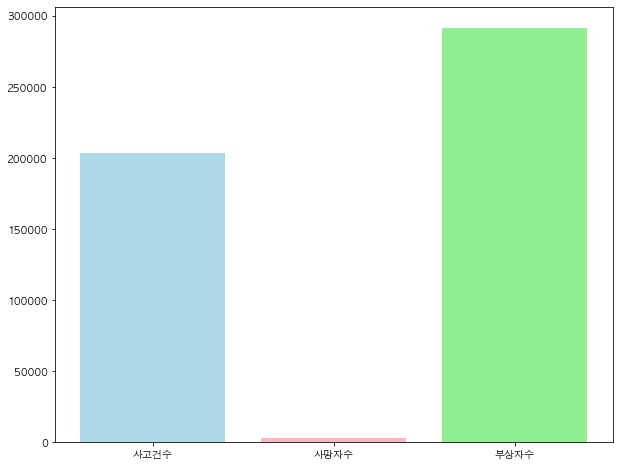

In [268]:
plt.rcParams['font.family'] = 'AppleGothic' #맥일 경우
# plt.rcParams['font.family'] = 'Malgun Gothic' #윈도우일 경우

color = ['lightblue', 'lightpink', 'lightgreen']
plt.figure(figsize=(10, 8))
sum_values = weather.iloc[:, 1:].sum()
plt.bar(range(len(sum_values)), sum_values, color=color)
plt.xticks(range(len(sum_values)), sum_values.index)


plt.show()

--- 
<h3>다음은 날씨별 사고가 많은 순서대로 정렬해보도록 하겠습니다. </h3>

---

In [227]:
#사고가 많은 순서로 정렬

(
weather.groupby(['기상상태'],as_index = False).agg('sum').sort_values('사고건수',ascending = False)
)

,기상상태,사고건수,사망자수,부상자수
2,맑음,178913,2372,256686
3,비,13373,267,19505
5,흐림,6982,197,9777
0,기타/불명,2260,35,3129
1,눈,1395,23,2217
4,안개,207,22,294


---
<h3>정렬되었습니다! 이제 시각화를 통해 한 눈에 알아볼 수 있도록 하겠습니다. </h3>

---

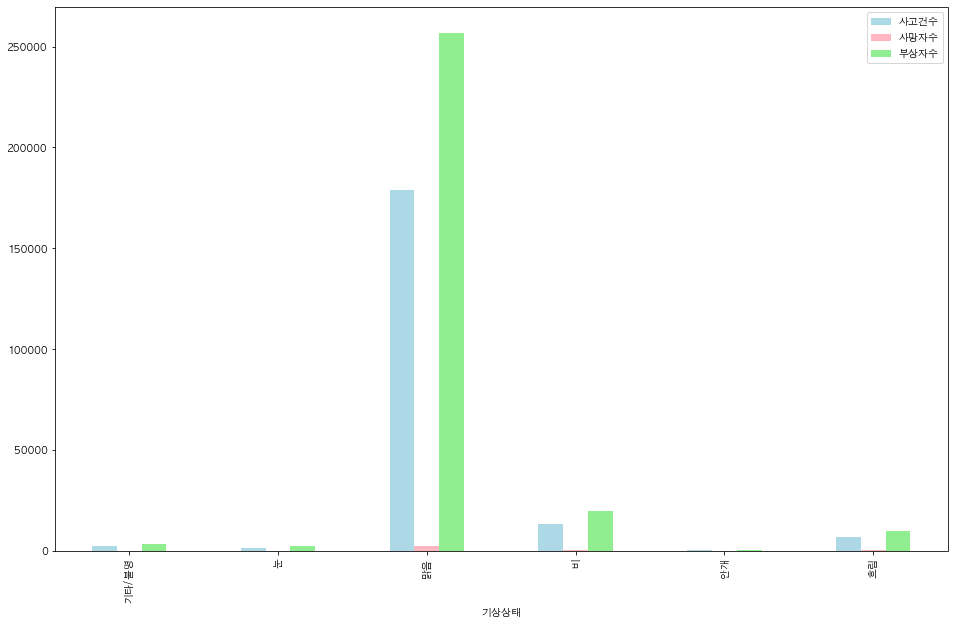

In [271]:
color=['lightblue', 'lightpink', 'lightgreen']
ax = weather.plot.bar(x=weather.columns[0], color=color, figsize=(16, 10))

plt.show()

---
<h3> 막대그래프로 시각화 한 모습입니다. </h3> <br>

    맑음이 압도적으로 높고, 비, 흐림, 불명, 눈, 안개 순으로 높은 것을 알 수 있습니다. 
    
    위 그래프에선 사망자수가 잘 보이지 않으니 사망자수만 따로 시각화하여 확인해보겠습니다.

---

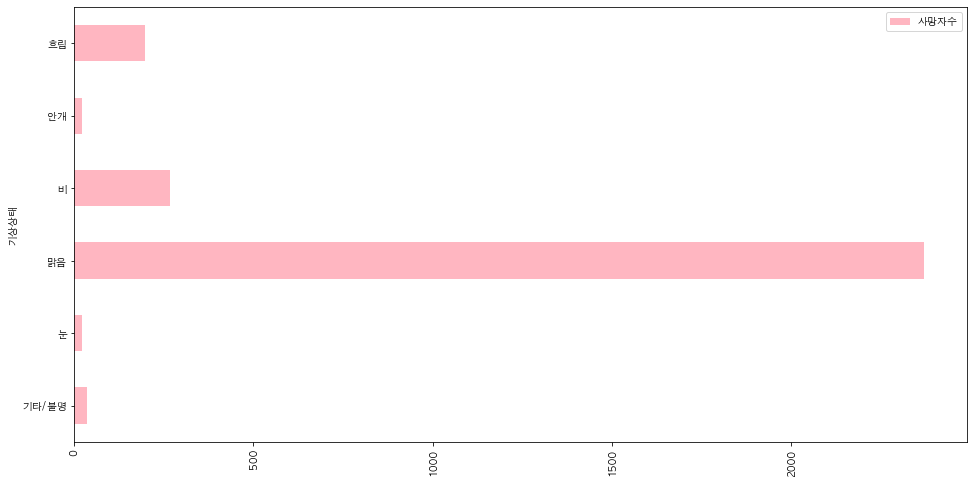

In [293]:
color = ['lightpink']
ax = weather.plot.barh(x=weather.columns[0], y=weather.columns[2], color=color, figsize=(16, 8))
plt.xticks(rotation=90)

plt.show()

---

    이젠 사망자수도 잘 보입니다!

---

<h3> 날씨별 정렬 결과 </h3><br>

    예상했던대로, 맑은 날에서 사고가 가장 많습니다. 사망자수, 부상자수도 마찬가지로 보입니다. 

<br> _그렇다면 치사율은 어떨까요?_


---

<h3> 치사율 구하고, 시각화하기 </h3> <br>

    치사율은 100건의 사고건수 당 사망자수 입니다.

---

In [297]:
weather['치사율'] = (weather['사망자수'] / weather['사고건수']) * 100
weather

,기상상태,사고건수,사망자수,부상자수,치사율
0,기타/불명,2260,35,3129,1.548673
1,눈,1395,23,2217,1.648746
2,맑음,178913,2372,256686,1.325784
3,비,13373,267,19505,1.996560
4,안개,207,22,294,10.628019
5,흐림,6982,197,9777,2.821541


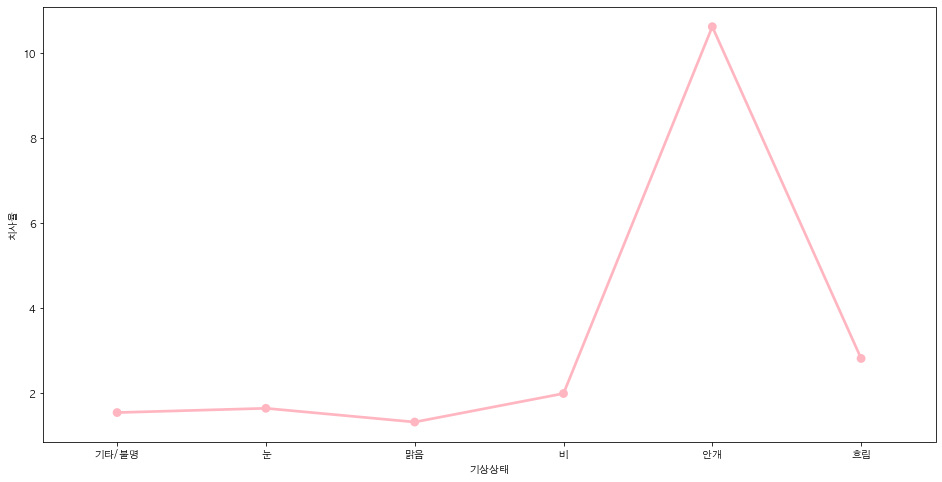

In [298]:
fig, ax = plt.subplots(figsize=(16, 8))

sns.pointplot(data=weather, x='기상상태', y='치사율', color='lightpink')

plt.xlabel('기상상태')
plt.ylabel('치사율')

plt.show()

#  시사점 및 결론
<br>

---

<h2> 시사점 </h2> <br>

교통사고는 맑은 날에 가장 많이 발생하지만, 치사율은 안개낀 날 가장 높았습니다.
    
---
<h2> 결론 </h2> <br>

안개낀 날의 치사율은 10.6 정도로 압도적으로 가장 높은 수치를 나타냈습니다.
<br> 이는 맑은 날의 **약 8배**, 비 오는 날의 **약 5배** 정도의 높은 결과입니다.

<br>

비나 눈에서 가장 높은 수치가 나올 것이라 생각했던 것과는 달리 안개에서 압도적으로 높은 수치를 나타냈습니다.<br>
<br>또한, 안개 다음으로 높은 수치를 나타낸 것은 흐림이었습니다. <br> 이 결과를 통해 가시거리가 좋지 않으면 치사율이 높아지는 것을 알 수 있습니다. <br> 

<br>
사고를 예방하기 위해선 눈,비 운전처럼 감속운전을 해야합니다.